# Unsupervised K means clusturing

## The dataset used is german stock prices for back to back dates, aim is to check if we can try to find objectives like divide companies into distinct clusters based on their stock performance etc.

In [30]:
# import relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [31]:
# read from file and create a dataframe df
df=pd.read_csv("dax_prices (1).csv")

In [32]:
df

,Date,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,...,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE,^GDAXI
0,02-01-2020,282.808960,199.297836,56.796947,67.664917,104.059540,67.103531,5.527939,106.563087,46.210567,...,58.680504,102.388107,244.415070,24.180038,116.524338,10.820473,108.536682,12.260,170.062805,13385.92969
1,03-01-2020,283.196991,197.093414,55.948608,66.799782,104.059540,66.289818,5.429477,104.347603,45.373741,...,57.541641,103.595512,241.381744,24.072411,115.053459,10.665895,106.450851,12.210,166.426010,13219.13965
2,06-01-2020,280.965942,195.878738,55.116909,66.026680,104.404266,66.045715,5.259747,103.157463,45.128704,...,56.460682,104.706329,241.473648,23.722628,114.193848,10.525808,105.956833,12.040,166.407165,13126.99023
3,07-01-2020,285.913055,196.328613,55.141865,66.385620,104.158035,67.103531,5.350707,105.391258,45.489326,...,56.750221,105.768852,243.128204,24.260756,114.709610,10.578944,106.633820,12.070,165.879547,13226.83008
4,08-01-2020,293.770203,196.418594,54.667793,68.106697,104.601257,67.275314,5.465111,107.423637,45.743610,...,56.016720,107.507515,243.587799,24.368387,115.397293,10.516148,107.072937,12.100,166.595612,13320.17969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,25-02-2022,213.850006,207.449997,60.430000,52.880001,89.660004,88.019997,8.130000,79.510002,72.059998,...,45.590000,177.199997,252.199997,40.000000,101.400002,21.799999,129.720001,8.616,185.320007,14567.23047
549,28-02-2022,212.050003,203.300003,59.250000,51.509998,90.419998,86.559998,7.534000,76.800003,70.169998,...,43.580002,177.550003,247.149994,41.490002,101.320000,22.940001,126.660004,9.600,178.039993,14461.01953
550,01-03-2022,204.350006,195.720001,55.520000,51.919998,93.279999,82.489998,6.690000,69.110001,66.440002,...,40.980000,173.949997,235.100006,39.070000,98.879997,22.510000,120.459999,9.452,164.479996,13904.84961
551,02-03-2022,205.500000,197.320007,57.290001,54.000000,91.620003,80.559998,6.830000,68.489998,64.059998,...,42.160000,174.250000,237.000000,37.570000,100.879997,22.959999,123.800003,9.642,160.000000,14000.11035


In [33]:
#set date column as index as it will not be used in modeling
df=df.set_index('Date')
df

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,DB1.DE,...,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE,^GDAXI
Date,,,,,,,,,,,,,,,,,,,,,
02-01-2020,282.808960,199.297836,56.796947,67.664917,104.059540,67.103531,5.527939,106.563087,46.210567,135.463043,...,58.680504,102.388107,244.415070,24.180038,116.524338,10.820473,108.536682,12.260,170.062805,13385.92969
03-01-2020,283.196991,197.093414,55.948608,66.799782,104.059540,66.289818,5.429477,104.347603,45.373741,133.783539,...,57.541641,103.595512,241.381744,24.072411,115.053459,10.665895,106.450851,12.210,166.426010,13219.13965
06-01-2020,280.965942,195.878738,55.116909,66.026680,104.404266,66.045715,5.259747,103.157463,45.128704,132.775864,...,56.460682,104.706329,241.473648,23.722628,114.193848,10.525808,105.956833,12.040,166.407165,13126.99023
07-01-2020,285.913055,196.328613,55.141865,66.385620,104.158035,67.103531,5.350707,105.391258,45.489326,133.543610,...,56.750221,105.768852,243.128204,24.260756,114.709610,10.578944,106.633820,12.070,165.879547,13226.83008
08-01-2020,293.770203,196.418594,54.667793,68.106697,104.601257,67.275314,5.465111,107.423637,45.743610,136.518722,...,56.016720,107.507515,243.587799,24.368387,115.397293,10.516148,107.072937,12.100,166.595612,13320.17969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-02-2022,213.850006,207.449997,60.430000,52.880001,89.660004,88.019997,8.130000,79.510002,72.059998,152.199997,...,45.590000,177.199997,252.199997,40.000000,101.400002,21.799999,129.720001,8.616,185.320007,14567.23047
28-02-2022,212.050003,203.300003,59.250000,51.509998,90.419998,86.559998,7.534000,76.800003,70.169998,152.699997,...,43.580002,177.550003,247.149994,41.490002,101.320000,22.940001,126.660004,9.600,178.039993,14461.01953
01-03-2022,204.350006,195.720001,55.520000,51.919998,93.279999,82.489998,6.690000,69.110001,66.440002,147.449997,...,40.980000,173.949997,235.100006,39.070000,98.879997,22.510000,120.459999,9.452,164.479996,13904.84961


In [34]:
#gain information about df
df.shape

(553, 31)

In [35]:
# verify basic statistics about df
df.describe()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,DB1.DE,...,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE,^GDAXI
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,...,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,265.424617,189.279765,57.428017,52.566419,95.284933,71.308389,5.345944,100.015367,57.754681,142.179912,...,53.802821,146.011917,231.720970,31.289017,115.068802,9.926460,118.111752,8.263391,165.825152,13900.874326
std,31.934967,23.464261,9.906506,6.806971,5.584724,15.951757,1.240433,17.239737,18.385568,10.247324,...,7.784353,38.578718,25.092547,3.721914,12.039914,4.022723,21.102102,2.251051,35.605159,1739.791533
min,161.915527,107.071976,32.465500,38.872898,81.265114,34.049026,2.806636,49.555496,20.194874,95.088051,...,28.153130,78.491112,133.973282,18.834600,83.696938,5.019927,57.673389,3.550000,82.157768,8441.709961
25%,246.788925,175.274124,49.404606,47.619469,91.166595,57.842896,4.660000,90.000000,40.754997,135.319076,...,47.799999,113.351364,223.641190,30.160849,103.954979,6.252000,104.054619,6.210000,134.280029,12870.870120
50%,272.120911,194.839996,61.386387,51.470001,94.382637,69.825867,5.328000,98.699997,60.209999,143.524612,...,55.220001,137.745300,234.706573,31.875422,116.867111,8.998000,123.664322,8.780000,164.929642,13920.690430
75%,286.864929,205.800003,66.110001,54.658989,100.167435,85.070000,6.114022,114.599998,73.570000,147.750000,...,60.612148,177.550003,248.551483,33.249027,124.139999,12.235000,135.876587,9.734000,193.679993,15482.009770
max,336.250000,231.949997,70.760002,72.055046,106.949997,99.320000,9.210000,131.240005,90.970001,165.328751,...,66.120552,229.399994,280.200012,41.490002,139.921860,22.959999,153.592850,12.260000,240.811340,16271.750000


In [36]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 02-01-2020 to 03-03-2022
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ADS.DE   553 non-null    float64
 1   ALV.DE   553 non-null    float64
 2   BAS.DE   553 non-null    float64
 3   BAYN.DE  553 non-null    float64
 4   BEI.DE   553 non-null    float64
 5   BMW.DE   553 non-null    float64
 6   CBK.DE   553 non-null    float64
 7   CON.DE   553 non-null    float64
 8   DAI.DE   553 non-null    float64
 9   DB1.DE   553 non-null    float64
 10  DBK.DE   553 non-null    float64
 11  DPW.DE   553 non-null    float64
 12  DTE.DE   553 non-null    float64
 13  EOAN.DE  553 non-null    float64
 14  FME.DE   553 non-null    float64
 15  FRE.DE   553 non-null    float64
 16  HEI.DE   553 non-null    float64
 17  HEN3.DE  553 non-null    float64
 18  IFX.DE   553 non-null    float64
 19  LHA.DE   553 non-null    float64
 20  LIN.DE   553 non-null    float64
 21  LXS.D

#### Checking for any null values

In [37]:
df.isnull().sum()

ADS.DE     0
ALV.DE     0
BAS.DE     0
BAYN.DE    0
BEI.DE     0
BMW.DE     0
CBK.DE     0
CON.DE     0
DAI.DE     0
DB1.DE     0
DBK.DE     0
DPW.DE     0
DTE.DE     0
EOAN.DE    0
FME.DE     0
FRE.DE     0
HEI.DE     0
HEN3.DE    0
IFX.DE     0
LHA.DE     0
LIN.DE     0
LXS.DE     0
MRK.DE     0
MUV2.DE    0
RWE.DE     0
SAP.DE     0
SDF.DE     0
SIE.DE     0
TKA.DE     0
VOW3.DE    0
^GDAXI     0
dtype: int64

### Since we will be using unsupervised modeling, there will not be y variables in train test split.

In [38]:
X=df
from sklearn.model_selection import train_test_split
# splitting by 70/30 ratio
X_train, X_test=train_test_split(X,test_size=0.3,random_state=42)

In [39]:
# import KMeans from cluster
from sklearn.cluster import KMeans

#### Using elbow method below code will be used to find the value of k and using k-means ++ to make sure that centroid are not intilized too close to each other

In [40]:
#Elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\Nishant Ahuja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nishant Ahuja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Nishant Ahuja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nishant Ahuja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

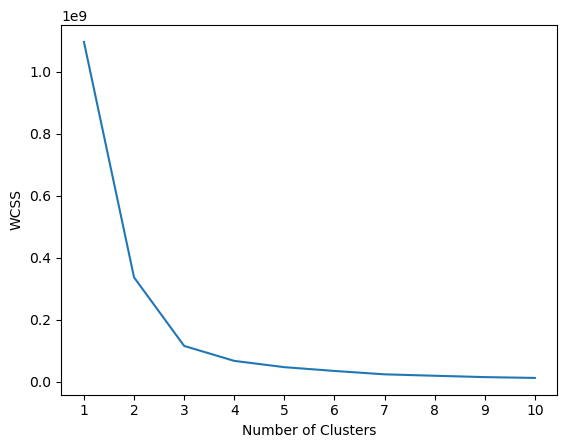

In [41]:
#Plot k and WCSS
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### from above graph k=3 seems appropriate as value after 3 seems to be stable

In [42]:
kmeans=KMeans(n_clusters=3,init="k-means++")

#### Fitting to X_train

In [43]:
y_labels=kmeans.fit_predict(X_train)

C:\Users\Nishant Ahuja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nishant Ahuja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [44]:
y_labels

array([1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1,
       1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1,

#### Predicting X_test

In [45]:
y_test_labels=kmeans.predict(X_test)
y_test_labels

array([0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1,
       2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1])

#### plot the clusters for the first 3 stocks

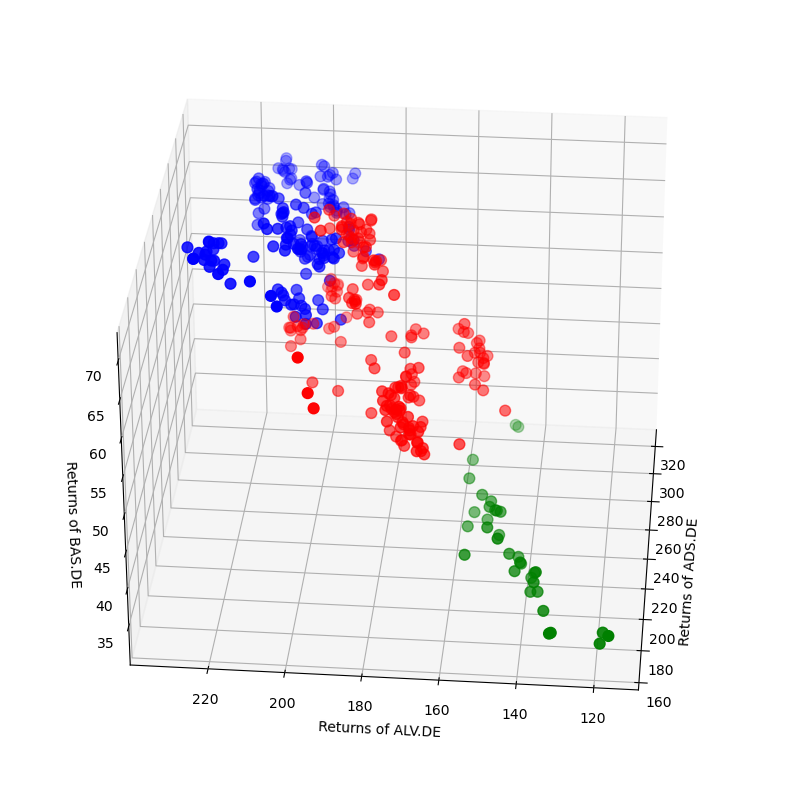

In [46]:
X_train["label"] = y_labels 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each of the 3 cluster labels (0, 1, 2)
ax.scatter(X_train['ADS.DE'][X_train['label'] == 0], X_train['ALV.DE'][X_train['label'] == 0], X_train['BAS.DE'][X_train['label'] == 0], c='blue', s=60)
ax.scatter(X_train['ADS.DE'][X_train['label'] == 1], X_train['ALV.DE'][X_train['label'] == 1], X_train['BAS.DE'][X_train['label'] == 1], c='red', s=60)
ax.scatter(X_train['ADS.DE'][X_train['label'] == 2], X_train['ALV.DE'][X_train['label'] == 2], X_train['BAS.DE'][X_train['label'] == 2], c='green', s=60)

# Set viewing angle and labels
ax.view_init(30, 185)
plt.xlabel("Returns of ADS.DE")
plt.ylabel("Returns of ALV.DE")
ax.set_zlabel('Returns of BAS.DE')
plt.show()


### Perfromance Metrics

#### Silhoutte Score gives score value from -1 to +1 where value more towards +1 is well clustured

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
# Similar to wcsss calculate silhoutte score

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\Nishant Ahuja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nishant Ahuja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Nishant Ahuja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nishant Ahuja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

In [49]:
#printing coefficients
silhouette_coefficients

[0.662121149870632,
 0.7053221962516976,
 0.6344940362553347,
 0.6368679961043076,
 0.5534383558369432,
 0.5567632385611969,
 0.555821904354539,
 0.549692804983487,
 0.5540506500186092]

#### Plotting silhoutte coefficients to check coeff value for k=3, from the below graph k=3 has the highest value which means that model output is well clustured 

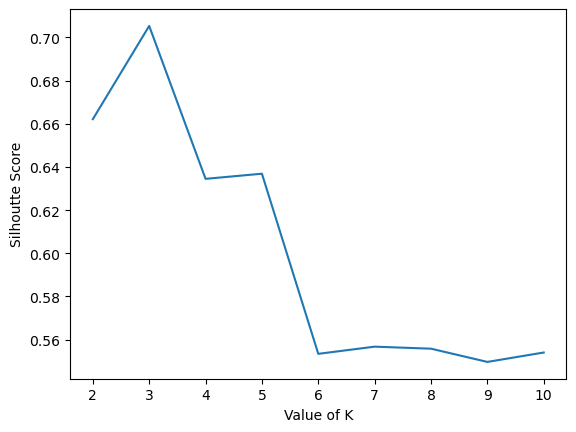

In [50]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Value of K")
plt.ylabel("Silhoutte Score")
plt.show()